### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

pd.set_option('display.max_columns', None)

In [4]:
import warnings 
warnings.simplefilter('ignore')

### Reading the datasets

In [5]:
# app data

data_df = pd.read_csv('googleplaystore.csv')

# user reviews data

reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

In [6]:
# shape of the datasets

print(data_df.shape)
print(reviews_df.shape)

(10841, 13)
(64295, 5)


In [7]:
# first 5 rows of app data

data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
# first 5 rows of reviws data

reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Exploratory Data Analysis

In [9]:
# summary of numerical columns in app data

data_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
# list of columns in app data

data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
data_df.columns = data_df.columns.str.replace(' ','_')

In [12]:
data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [13]:
# datatypes of the columns in app data

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
# na values in count in app data

data_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [15]:
# handling na values in Rating column

data_df['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [16]:
# filling na valuesin Rating with the mean

data_df['Rating'] = data_df['Rating'].fillna(round(data_df['Rating'].mean(),1))

In [17]:
data_df['Rating'].isna().sum()

0

In [18]:
data_df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [19]:
data_df['Size'] = data_df['Size'].str.replace('M','e+6')

data_df['Size'] = data_df['Size'].str.replace('k','e+3')

In [20]:
data_df['Size'].value_counts()

Varies with device    1695
11e+6                  198
12e+6                  196
14e+6                  194
13e+6                  191
                      ... 
429e+3                   1
200e+3                   1
460e+3                   1
728e+3                   1
619e+3                   1
Name: Size, Length: 462, dtype: int64

In [21]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False 

In [22]:
temp = data_df['Size'].apply(lambda x: is_convertable(x))

temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [23]:
data_df.Size[~temp].value_counts()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

In [24]:
# replacing varies with device with np.nan
data_df['Size'] = data_df['Size'].replace('Varies with device', np.nan)

# replacing 1000+ with 1000
data_df['Size'] = data_df['Size'].replace('1,000+', 1000)

In [25]:
data_df.Size[~temp].value_counts()

1000    1
Name: Size, dtype: int64

In [26]:
data_df['Size'].sample(8)

10376     39e+6
8176      14e+6
8715      13e+6
3437        NaN
2306        NaN
3661      22e+6
412         NaN
643      5.0e+6
Name: Size, dtype: object

In [27]:
# changing the datatype if size to numeric

data_df['Size'] = pd.to_numeric(data_df['Size'])

In [28]:
data_df['Size'].dtype

dtype('float64')

In [29]:
# filling na values in size column with its mean

data_df['Size'] = data_df['Size'].fillna(round(data_df['Size'].mean(),2))

In [30]:
# na values in count in app data

data_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       3
dtype: int64

In [31]:
# dropping all the other na values

data_df.dropna( subset=['Type','Content_Rating','Current_Ver','Android_Ver'], inplace=True )

In [32]:
# na values in count in app data

data_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [33]:
# datatypes of the columns in app data

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [34]:
## inspecting the Reviews column

data_df['Reviews'].value_counts()

0         594
1         271
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 5999, dtype: int64

In [35]:
# changing the datatype of Reviews to int

data_df['Reviews'] = data_df['Reviews'].astype(int)

print(data_df['Reviews'].dtype)

int32


In [36]:
## inspecting the installs column

data_df['Installs'].value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+             905
5,000,000+         752
100+               718
500,000+           538
50,000+            478
5,000+             476
100,000,000+       409
10+                385
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: Installs, dtype: int64

In [37]:
# removing unwanted charecters

data_df['Installs'] = data_df['Installs'].apply(lambda x:x.strip('+').replace(',',''))

In [38]:
data_df['Installs'].value_counts()

1000000       1578
10000000      1252
100000        1169
10000         1052
1000           905
5000000        752
100            718
500000         538
50000          478
5000           476
100000000      409
10             385
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               14
Name: Installs, dtype: int64

In [39]:
# changing the datatype of Installs to int

data_df['Installs'] = data_df['Installs'].astype(int)

print(data_df['Installs'].dtype)

int32


In [40]:
# inspecting the price column

data_df['Price'].value_counts()

0         10032
$0.99       146
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [41]:
# removing unwanted charecters

data_df['Price'] = data_df['Price'].apply(lambda x:x.strip('$'))

In [42]:
data_df['Price'].value_counts()

0        10032
0.99       146
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: Price, Length: 92, dtype: int64

In [43]:
# changing the datatype of Installs to int

data_df['Price'] = data_df['Price'].astype(float)

print(data_df['Price'].dtype)

float64


In [44]:
# function to seperate apps as free and paid

def is_free(price):
    if price > 0:
        return 1
    else:
        return 0

In [45]:
# converting price greater than 0-->1 
# converting price 0-->0 
# in a new column

data_df['is_free'] = data_df['Price'].apply(lambda x: int(is_free(x)))

print(data_df['is_free'].value_counts())

0    10032
1      797
Name: is_free, dtype: int64


In [46]:
# once again checking the datatype of columns

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  int32  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
 13  is_free         10829 non-null  int64  
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 1.2+ MB


In [47]:
data_df["Android_Ver"].replace('Varies with device',np.nan,inplace=True)

In [48]:
#finding out the minimum android version supported for the apps

data_df['Android_Ver'] = data_df["Android_Ver"].apply(lambda x: re.sub("[a-zA-Z]","", str(x)))

In [49]:
data_df['Android_Ver'].head()

0    4.0.3  
1    4.0.3  
2    4.0.3  
3      4.2  
4      4.4  
Name: Android_Ver, dtype: object

In [50]:
# inspecting the content rating column

data_df['Content_Rating'].value_counts()

Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64

In [51]:
# getting the index of apps which are unrated and adults only since they have a total of 5 apps

index1 = data_df[data_df['Content_Rating']=='Unrated'].index

index2 = data_df[data_df['Content_Rating']=='Adults only 18+'].index

print(index1,index2)

Int64Index([7312, 8266], dtype='int64') Int64Index([298, 3043, 6424], dtype='int64')


In [52]:
# dropping the apps which are unrated

data_df.drop(index1, inplace=True)

data_df.drop(index2, inplace=True)

In [53]:
# checking for duplicate record in app data

data_df[data_df.duplicated(['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,21514177.07,5000000,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3,0
236,Box,BUSINESS,4.2,159872,21514177.07,10000000,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,,0
239,Google My Business,BUSINESS,4.4,70991,21514177.07,5000000,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4,0
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000000.00,10000000,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0,0
261,join.me - Simple Meetings,BUSINESS,4.0,6989,21514177.07,1000000,Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1400000.00,100000,Free,0.0,Mature 17+,Dating,"February 25, 2016",2.2,4.0,0
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000000.00,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0,0
10730,FP Notebook,MEDICAL,4.5,410,60000000.00,50000,Free,0.0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4,0
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000000.00,1000000,Free,0.0,Everyone,Shopping,"July 30, 2018",3.9,4.4,0


In [54]:
data_df[data_df['App']=='Quick PDF Scanner + OCR FREE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,21514177.07,5000000,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3,0
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,21514177.07,5000000,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3,0
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,21514177.07,5000000,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3,0


In [55]:
# dropping the duplicate records from app data on the basis of app names

data_df.drop_duplicates( keep='last', subset=['App'], inplace=True )

In [56]:
# checking the shape of app data

data_df.shape

(9643, 14)

In [57]:
# describing the app data

data_df.describe()

,Rating,Reviews,Size,Installs,Price,is_free
count,9643.000000,9.643000e+03,9.643000e+03,9.643000e+03,9643.000000,9643.000000
mean,4.177300,2.169996e+05,2.055884e+07,7.806804e+06,1.098691,0.077880
std,0.494322,1.832236e+06,2.040479e+07,5.381362e+07,16.865546,0.267997
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000,0.000000
25%,4.000000,2.500000e+01,5.300000e+06,1.000000e+03,0.000000,0.000000
50%,4.200000,9.700000e+02,1.600000e+07,1.000000e+05,0.000000,0.000000
75%,4.500000,2.945350e+04,2.500000e+07,1.000000e+06,0.000000,0.000000
max,5.000000,7.812821e+07,1.000000e+08,1.000000e+09,400.000000,1.000000


### Visualization

In [58]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3,0


In [59]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9643 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9643 non-null   object 
 1   Category        9643 non-null   object 
 2   Rating          9643 non-null   float64
 3   Reviews         9643 non-null   int32  
 4   Size            9643 non-null   float64
 5   Installs        9643 non-null   int32  
 6   Type            9643 non-null   object 
 7   Price           9643 non-null   float64
 8   Content_Rating  9643 non-null   object 
 9   Genres          9643 non-null   object 
 10  Last_Updated    9643 non-null   object 
 11  Current_Ver     9643 non-null   object 
 12  Android_Ver     9643 non-null   object 
 13  is_free         9643 non-null   int64  
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 1.0+ MB


#### Distribution of App size

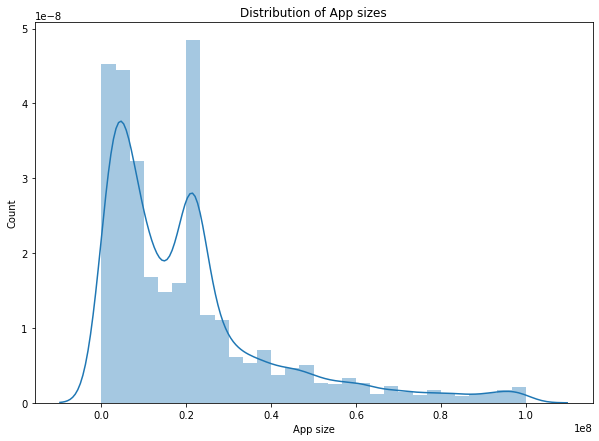

In [60]:
# distribution of app sizes in the data

plt.figure(figsize=(10,7))

sns.distplot( data_df['Size'], bins=30 )

# set title
plt.title('Distribution of App sizes')
# set x label
plt.xlabel('App size')
# set y label
plt.ylabel('Count')

plt.show();

In [61]:
pd.DataFrame(data_df['Size'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Size,9643.0,2.055884e+07,2.040479e+07,8500.0,5300000.0,16000000.0,25000000.0,100000000.0


In [62]:
print('Maximum size of the app is ' + str(round(data_df['Size'].max()/(1024*1024),2)) + ' mb')

print('Minimum size of the app is ' + str(round(data_df['Size'].min()/(1024*1024),4)) + ' mb')

print('Average size of the app is ' + str(round(data_df['Size'].mean()/(1024*1024),2)) + ' mb')

Maximum size of the app is 95.37 mb
Minimum size of the app is 0.0081 mb
Average size of the app is 19.61 mb


In [63]:
# list of all the apps of maximum size

data_df[data_df['Size']==data_df.Size.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
1080,Post Bank,FINANCE,4.5,60449,100000000.0,1000000,Free,0.00,Everyone,Finance,"July 23, 2018",2.9.12,4.0,0
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,10000000,Free,0.00,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0,0
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,5000000,Free,0.00,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3,0
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000000.0,500,Paid,15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3,1
3973,Hungry Shark Evolution,GAME,4.5,6071542,100000000.0,100000000,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1,0
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000000.0,5000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0,0
5427,Ultimate Tennis,SPORTS,4.3,183004,100000000.0,10000000,Free,0.00,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3,0
5530,The Walking Dead: Our World,GAME,4.0,22435,100000000.0,1000000,Free,0.00,Teen,Action,"August 1, 2018",1.1.0.3,5.0,0
5862,Miami crime simulator,GAME,4.0,254518,100000000.0,10000000,Free,0.00,Mature 17+,Action,"July 9, 2018",2.0,4.0,0
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100000000.0,10000000,Free,0.00,Mature 17+,Simulation,"May 31, 2018",2.1,4.0,0


In [64]:
# details of app of minimum size

data_df[data_df['Size']==data_df.Size.min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
1532,Essential Resources,LIBRARIES_AND_DEMO,4.6,237,8500.0,50000,Free,0.0,Everyone,Libraries & Demo,"September 27, 2017",1.02,7.1,0


In [65]:
data_df[data_df['Reviews']==data_df.Reviews.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
3943,Facebook,SOCIAL,4.1,78128208,21514177.07,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,,0


 #### Count of Apps in each category

In [66]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3,0


In [67]:
pd.DataFrame(data_df['Category'].value_counts()).T

,FAMILY,GAME,TOOLS,BUSINESS,MEDICAL,PRODUCTIVITY,PERSONALIZATION,LIFESTYLE,FINANCE,SPORTS,COMMUNICATION,HEALTH_AND_FITNESS,PHOTOGRAPHY,NEWS_AND_MAGAZINES,SOCIAL,BOOKS_AND_REFERENCE,TRAVEL_AND_LOCAL,SHOPPING,DATING,VIDEO_PLAYERS,MAPS_AND_NAVIGATION,FOOD_AND_DRINK,EDUCATION,AUTO_AND_VEHICLES,LIBRARIES_AND_DEMO,ENTERTAINMENT,WEATHER,HOUSE_AND_HOME,EVENTS,PARENTING,ART_AND_DESIGN,COMICS,BEAUTY
Category,1901,926,826,419,396,374,374,369,345,326,316,287,281,254,239,221,219,202,170,163,131,112,102,85,83,79,79,73,64,60,60,54,53


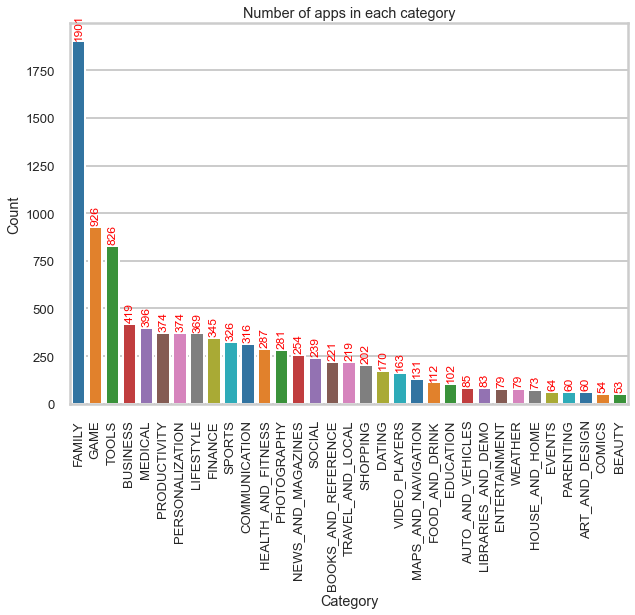

In [68]:
plt.figure(figsize=(10,7))

# set theme
sns.set_theme( style='whitegrid', context='poster', 
              font= 'sans-serif', color_codes= True, font_scale= .6 )

# count of apps on each category
ax = sns.countplot( x='Category', data=data_df, 
                   order=data_df['Category'].value_counts().index, palette='tab10' )

# set title
plt.title( 'Number of apps in each category' )
# set label
plt.ylabel( 'Count' )

_ = plt.xticks(
            rotation=90,
            horizontalalignment='center',
                fontweight='light')

labels = ( data_df['Category'].value_counts() )
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text( i, v+20, str(v), horizontalalignment = 'center', 
            size = 12, color = 'red',rotation='vertical' )

INSIGHTS :

1. From the graph we can see that FAMILY, GAME, TOOLS are the category of apps which have higher count in the play store.

2. And BEAUTY, COMICS, PARENTING are the category of apps which have the least number of count.

#### Average rating of apps in each Category

In [69]:
rating_per_cat = pd.DataFrame( data_df.groupby('Category')['Rating'].agg( np.mean ).sort_values( ascending=False ))

In [70]:
rating_per_cat.T

Category,ART_AND_DESIGN,EVENTS,EDUCATION,BOOKS_AND_REFERENCE,PERSONALIZATION,PARENTING,BEAUTY,SOCIAL,WEATHER,GAME,HEALTH_AND_FITNESS,SHOPPING,SPORTS,AUTO_AND_VEHICLES,FAMILY,PRODUCTIVITY,LIBRARIES_AND_DEMO,COMICS,MEDICAL,FOOD_AND_DRINK,PHOTOGRAPHY,HOUSE_AND_HOME,NEWS_AND_MAGAZINES,COMMUNICATION,BUSINESS,FINANCE,LIFESTYLE,ENTERTAINMENT,TRAVEL_AND_LOCAL,TOOLS,VIDEO_PLAYERS,MAPS_AND_NAVIGATION,DATING
Rating,4.373333,4.365625,4.35,4.31086,4.304011,4.283333,4.262264,4.240167,4.239241,4.238229,4.23554,4.227228,4.21411,4.191765,4.188638,4.186631,4.184337,4.181481,4.177525,4.175893,4.158719,4.150685,4.137008,4.136076,4.135322,4.126087,4.113008,4.111392,4.088584,4.060896,4.057669,4.052672,4.028235


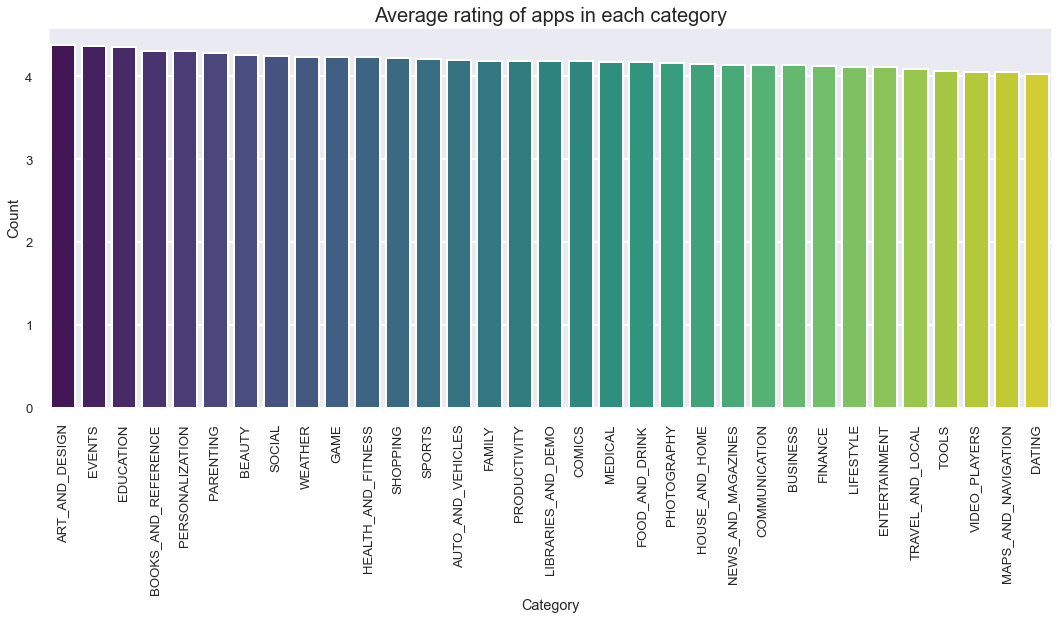

In [71]:
plt.figure(figsize=(18,7))

# set theme
sns.set_theme( style='darkgrid', context='poster', 
              font= 'sans-serif', color_codes= True, font_scale= .6, palette='deep' )

ax = sns.barplot( x=rating_per_cat.index, y=rating_per_cat['Rating'], data=rating_per_cat, 
                    palette='viridis' )

# set title
plt.title( 'Average rating of apps in each category', fontsize=20 )
# set label
plt.ylabel( 'Count', fontsize=15 )

_ = plt.xticks(
            rotation=90,
            horizontalalignment='center',
                fontweight='light')

In [72]:
# descriptive statistics

data_df.groupby('Category')['Rating'].describe().T

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
count,60.000000,85.000000,53.000000,221.00000,419.000000,54.000000,316.000000,170.000000,102.000000,79.000000,64.000000,1901.000000,345.000000,112.000000,926.000000,287.000000,73.000000,83.000000,369.000000,131.000000,396.000000,254.000000,60.000000,374.000000,281.000000,374.000000,202.000000,239.000000,326.000000,826.000000,219.000000,163.000000,79.000000
mean,4.373333,4.191765,4.262264,4.31086,4.135322,4.181481,4.136076,4.028235,4.350000,4.111392,4.365625,4.188638,4.126087,4.175893,4.238229,4.235540,4.150685,4.184337,4.113008,4.052672,4.177525,4.137008,4.283333,4.304011,4.158719,4.186631,4.227228,4.240167,4.214110,4.060896,4.088584,4.057669,4.239241
std,0.324098,0.503372,0.323578,0.38738,0.524238,0.520549,0.424222,0.563193,0.268752,0.341185,0.366978,0.484646,0.617208,0.519918,0.378056,0.616491,0.344046,0.334402,0.637841,0.502659,0.592207,0.508474,0.473418,0.324611,0.478170,0.479201,0.419549,0.421554,0.413596,0.580790,0.493636,0.539306,0.322418
min,3.400000,2.100000,3.100000,2.70000,1.000000,2.800000,1.000000,1.000000,3.500000,3.000000,2.900000,1.000000,1.000000,1.700000,1.000000,1.400000,2.800000,3.100000,1.500000,1.900000,1.000000,1.700000,2.000000,2.500000,2.000000,1.000000,1.600000,1.900000,1.500000,1.000000,2.200000,1.800000,3.300000
25%,4.175000,4.000000,4.100000,4.20000,4.100000,3.900000,4.000000,3.900000,4.200000,3.900000,4.200000,4.000000,4.000000,4.100000,4.100000,4.200000,4.000000,4.050000,3.900000,3.800000,4.175000,4.000000,4.100000,4.200000,4.000000,4.100000,4.100000,4.100000,4.100000,3.900000,3.900000,3.800000,4.150000
50%,4.400000,4.200000,4.200000,4.30000,4.200000,4.400000,4.200000,4.200000,4.400000,4.200000,4.250000,4.200000,4.200000,4.200000,4.300000,4.400000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.350000,4.300000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000
75%,4.700000,4.500000,4.500000,4.60000,4.400000,4.500000,4.300000,4.200000,4.600000,4.300000,4.600000,4.500000,4.500000,4.500000,4.500000,4.600000,4.400000,4.400000,4.500000,4.400000,4.500000,4.400000,4.600000,4.500000,4.500000,4.475000,4.500000,4.500000,4.500000,4.400000,4.400000,4.400000,4.500000
max,5.000000,4.900000,4.900000,5.00000,5.000000,5.000000,5.000000,5.000000,4.900000,4.700000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.800000,5.000000,5.000000,4.900000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,4.800000


INSIGHTS :

1. From the graph we cans see that ART_AND_DESIGN, EVENTS, EDUCATION are the category of apps which got higher rating.

2. And DATING, MAPS_AND_NAVIGATION, VIDEO_PLAYERS are the category of apps which have the lowest ratings in the app store.

#### Number of Installs in each Category

In [73]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3,0


In [74]:
install_per_cat = pd.DataFrame(data_df.groupby('Category')['Installs'].agg(sum).sort_values(ascending=False))

install_per_cat.T

Category,COMMUNICATION,GAME,FAMILY,TOOLS,PRODUCTIVITY,SOCIAL,PHOTOGRAPHY,VIDEO_PLAYERS,TRAVEL_AND_LOCAL,NEWS_AND_MAGAZINES,BOOKS_AND_REFERENCE,PERSONALIZATION,SHOPPING,SPORTS,HEALTH_AND_FITNESS,ENTERTAINMENT,BUSINESS,LIFESTYLE,MAPS_AND_NAVIGATION,FINANCE,WEATHER,FOOD_AND_DRINK,EDUCATION,DATING,ART_AND_DESIGN,HOUSE_AND_HOME,AUTO_AND_VEHICLES,LIBRARIES_AND_DEMO,COMICS,MEDICAL,PARENTING,BEAUTY,EVENTS
Installs,1.103928e+10,1.089792e+10,8.870582e+09,8.102222e+09,5.788091e+09,5.487868e+09,4.658148e+09,3.917003e+09,2.894887e+09,2.369218e+09,1.665969e+09,1.532484e+09,1.400349e+09,1.295474e+09,1.134023e+09,708660000.0,692164865.0,503823539.0,503281890.0,455348734.0,361100520.0,211798751.0,176951000.0,140925107.0,113233100.0,97202461.0,53130211.0,51995910.0,43981150.0,39203077.0,31521110.0,27197050.0,15973161.0


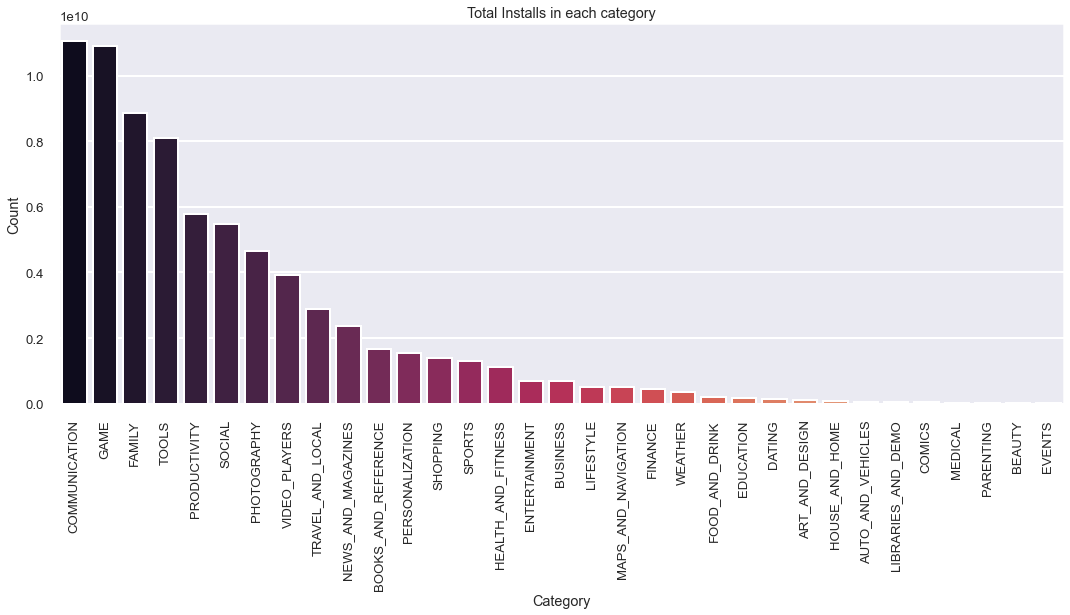

In [75]:
plt.figure(figsize=(18,7))

# set theme
sns.set_theme( style='darkgrid', context='poster', 
              font= 'sans-serif', color_codes= True, font_scale= .6, palette='deep' )

ax = sns.barplot( x=install_per_cat.index, y=install_per_cat['Installs'], data=install_per_cat, 
                    palette='rocket' )

# set title
plt.title( 'Total Installs in each category' )
# set label
plt.ylabel( 'Count' )

_ = plt.xticks(
            rotation=90,
            horizontalalignment='center',
                fontweight='light')

In [76]:
print('Maximum number of installed app is : '+data_df[data_df['Installs']==data_df.Installs.max()]['App'].iloc[0] + ' with number of '+str(data_df['Installs'].max()))

Maximum number of installed app is : Google Play Books with number of 1000000000


INSIGHTS :

1. From the graph we can see that COMMUNICATION, GAME, FAMILY are the category of apps which have the maximum number of installs.

2. And EVENTS, BEAUTY, PARENTING are the category of apps which have the minimum number of installs.

#### Review per Ratings

In [77]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3,0


In [78]:
rev_per_rat = pd.DataFrame(data_df.groupby('Rating')['Reviews'].agg(sum).sort_values(ascending=False))

rev_per_rat.T

Rating,4.5,4.4,4.6,4.3,4.7,4.1,4.2,4.0,4.8,3.9,3.8,3.7,4.9,3.6,3.5,3.3,3.4,3.1,3.2,3.0,2.8,2.9,2.7,2.4,2.5,2.6,1.8,2.1,2.0,5.0,2.3,1.7,2.2,1.9,1.6,1.4,1.5,1.2,1.0
Reviews,507977449,395542220,326657580,306072616,137646531,134641245,124015965,100189629,20882096,11447116,10595355,8160063,2040656,1633834,1552131,1548894,951731,320836,226874,161472,124730,57937,25048,14829,14807,3704,3418,3073,2997,2384,2361,2360,1979,1875,691,98,61,44,28


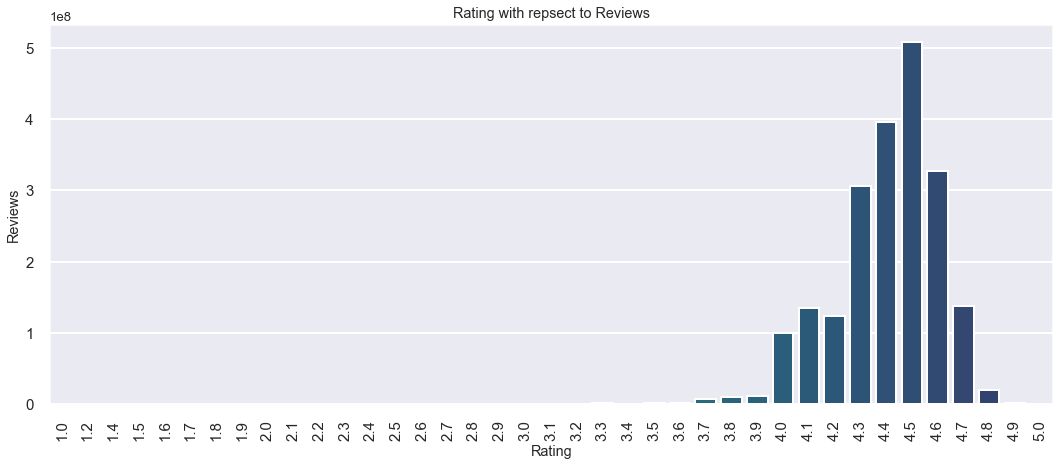

In [79]:
plt.figure(figsize=(18,7))

# set theme
sns.set_theme( style='darkgrid', context='poster', 
              font= 'sans-serif', color_codes= True, font_scale= .6, palette='deep' )

ax = sns.barplot( x = rev_per_rat.index, y = rev_per_rat['Reviews'],
            data = rev_per_rat,palette ='crest', saturation=0.75, )

_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light')

# set title
plt.title( 'Rating with repsect to Reviews' )
# set y label
plt.ylabel( 'Reviews' )

# fontsize of x and y labels
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.show();

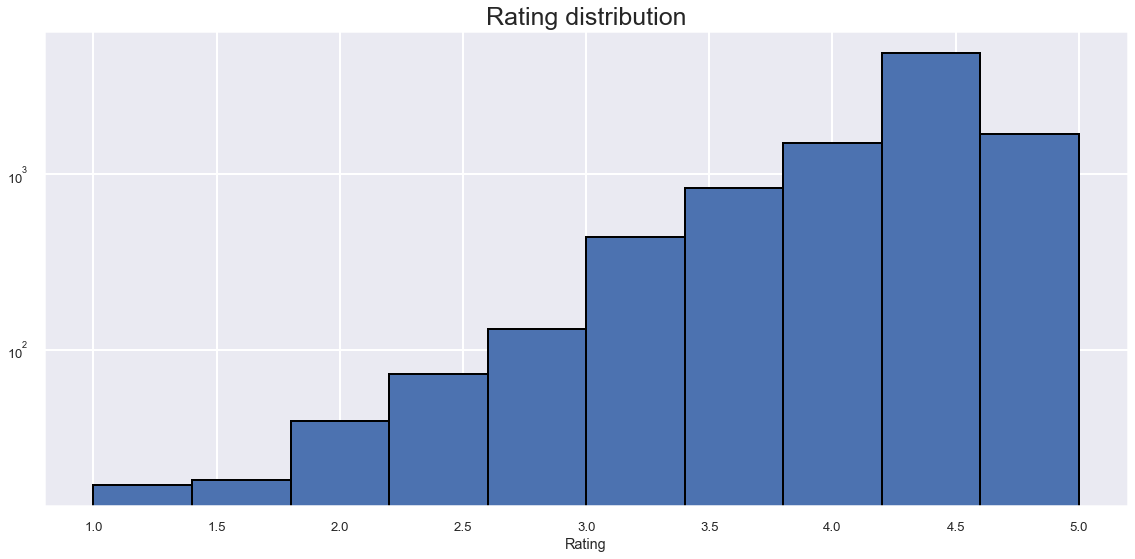

In [80]:
fig = plt.figure(figsize=(16,8)) 

plt.hist(data_df['Rating'],edgecolor = 'black', log=True)

# set title
plt.title("Rating distribution", fontsize=25)
# set x label
plt.xlabel('Rating')

plt.tight_layout()

In [81]:
# since there are number of apps with rating of 5 I am printing the first one. 

print('App with a maximum rating is : ' +data_df[data_df['Rating']==data_df.Rating.max()]['App'].iloc[0] +' with a value of ' +str(data_df['Rating'].max()))

App with a maximum rating is : Hojiboy Tojiboyev Life Hacks with a value of 5.0


INSIGHTS :

1. From the graph we can see that most of the apps are being rated above 4.0 which is good review for the apps.

2. With maximum being 4.5 and minimum being 1.0

#### Number of Install in each Contents

In [82]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3,0


In [83]:
con_rating_per_installs = pd.DataFrame(data_df.groupby('Content_Rating')['Installs'].agg(sum).sort_values(ascending=False))

con_rating_per_installs.T

Content_Rating,Everyone,Teen,Everyone 10+,Mature 17+
Installs,5.233947e+10,1.648728e+10,4.016272e+09,2.437987e+09


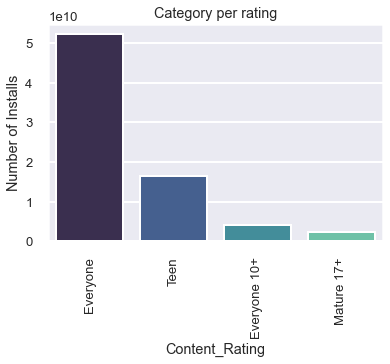

In [84]:
# set theme
sns.set_theme( style='darkgrid', context='poster', 
              font= 'sans-serif', color_codes= True, font_scale= .6, palette='deep' )

sns.barplot(x =con_rating_per_installs.index , y = con_rating_per_installs['Installs'],
            data = con_rating_per_installs,palette ='mako')

_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light')

# set title
plt.title('Category per rating')
# set y label
plt.ylabel('Number of Installs')


plt.show();

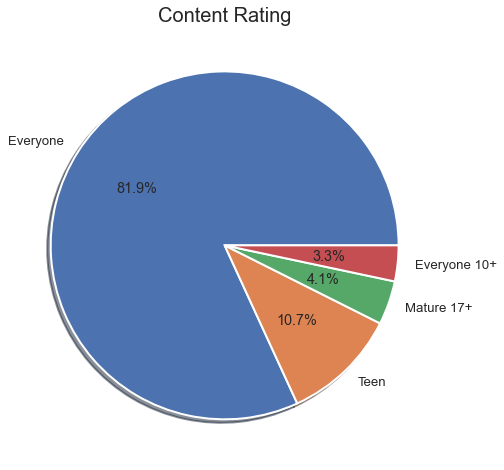

In [85]:
# set theme
sns.set_theme( style='darkgrid', context='poster', 
              font= 'sans-serif', color_codes= True, font_scale= .6, palette='deep' )

fig = plt.figure(figsize=(16,8)) 

labels = data_df['Content_Rating'].value_counts(sort = True).index
sizes = data_df['Content_Rating'].value_counts(sort = True)

plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Content Rating',size = 20)
plt.show()

In [86]:
# descriptive statistics

pd.DataFrame(data_df.groupby('Content_Rating')['Installs'].describe())

,count,mean,std,min,25%,50%,75%,max
Content_Rating,,,,,,,,
Everyone,7893.0,6.631126e+06,4.674120e+07,0.0,1000.0,50000.0,1000000.0,1.000000e+09
Everyone 10+,321.0,1.251175e+07,6.508344e+07,5.0,50000.0,1000000.0,5000000.0,1.000000e+09
Mature 17+,393.0,6.203529e+06,2.969997e+07,1.0,10000.0,500000.0,1000000.0,5.000000e+08
Teen,1036.0,1.591436e+07,9.268921e+07,0.0,10000.0,500000.0,5000000.0,1.000000e+09


INSIGHTS :

1. From the graph we can see that 81.9% of the apps in play store are apps which can be used by everyone.

2. Followed by Teen, Mature 17+, Everyone 10+ with 10.7%, 4.1%, 3.3% respectively.

#### Average app size in each Category

In [87]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3,0


In [88]:
avg_app_size_in_cat = pd.DataFrame(data_df.groupby('Category')['Size'].agg(np.mean).sort_values(ascending=False))

avg_app_size_in_cat.T

Category,GAME,FAMILY,SPORTS,TRAVEL_AND_LOCAL,ENTERTAINMENT,PARENTING,HEALTH_AND_FITNESS,FOOD_AND_DRINK,AUTO_AND_VEHICLES,MEDICAL,EDUCATION,FINANCE,MAPS_AND_NAVIGATION,SOCIAL,HOUSE_AND_HOME,VIDEO_PLAYERS,PHOTOGRAPHY,SHOPPING,DATING,LIFESTYLE,WEATHER,COMICS,EVENTS,BUSINESS,BEAUTY,PRODUCTIVITY,NEWS_AND_MAGAZINES,BOOKS_AND_REFERENCE,COMMUNICATION,ART_AND_DESIGN,PERSONALIZATION,LIBRARIES_AND_DEMO,TOOLS
Size,3.956675e+07,2.722212e+07,2.393313e+07,2.363934e+07,2.284011e+07,2.241308e+07,2.083154e+07,2.071286e+07,2.021091e+07,1.930526e+07,1.903285e+07,1.792093e+07,1.731091e+07,1.714101e+07,1.707433e+07,1.706550e+07,1.694030e+07,1.650516e+07,1.612993e+07,1.547750e+07,1.525200e+07,1.481737e+07,1.478958e+07,1.469568e+07,1.466953e+07,1.437793e+07,1.435732e+07,1.425281e+07,1.366118e+07,1.270547e+07,1.193743e+07,1.112488e+07,1.026547e+07


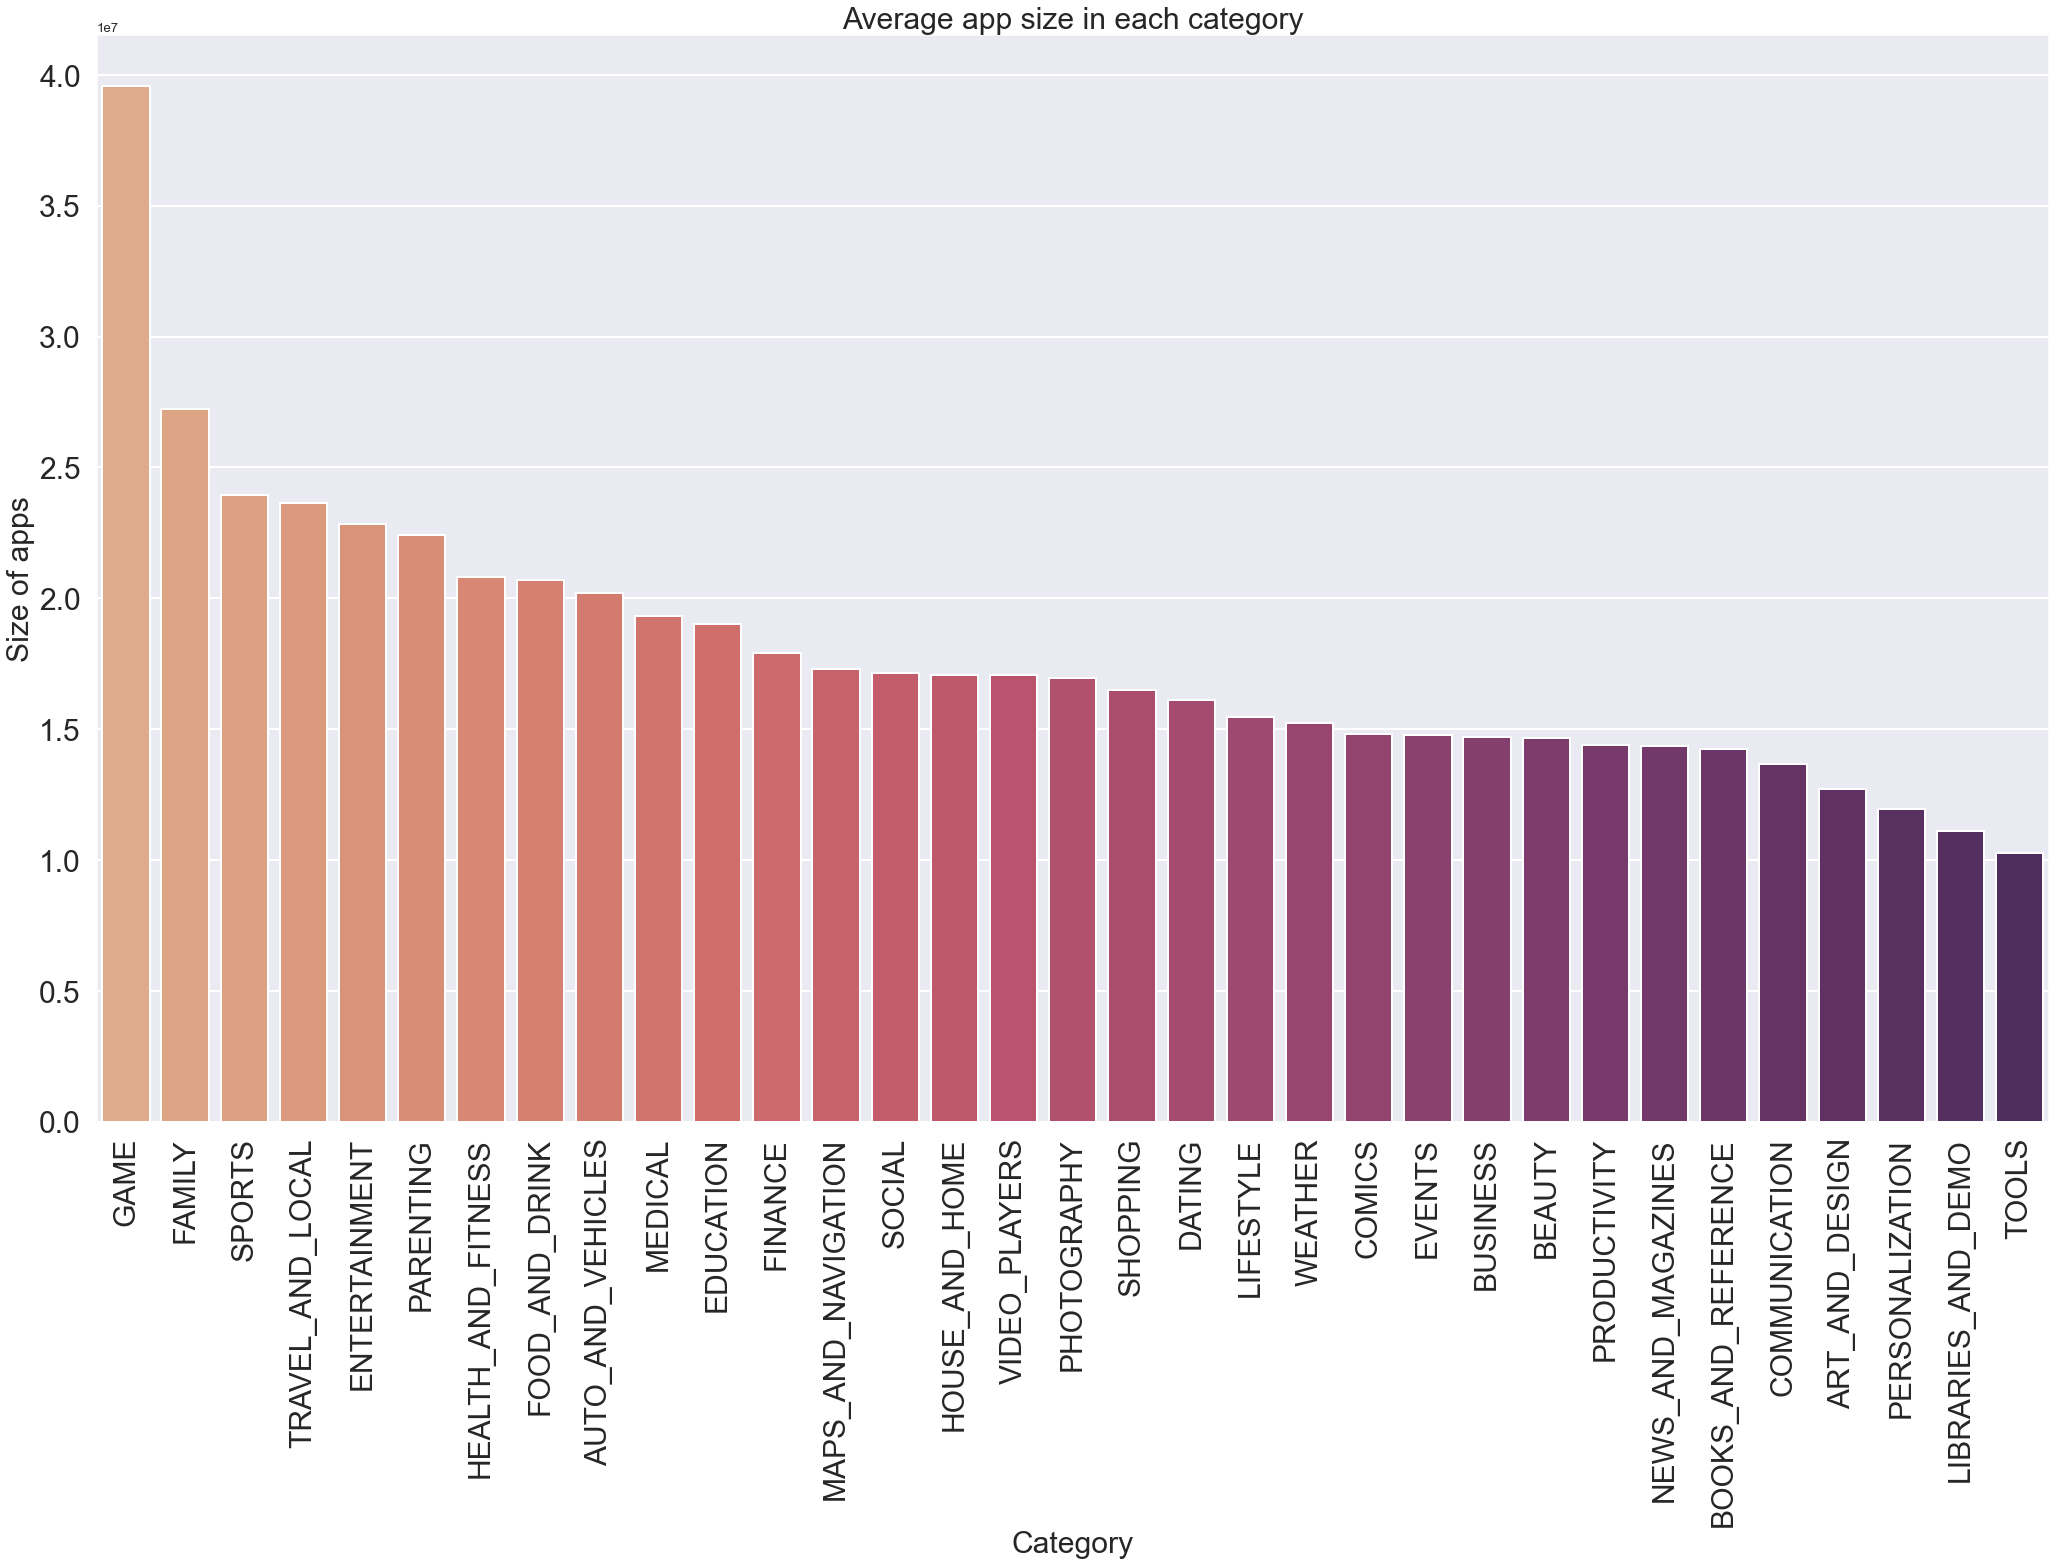

In [89]:
plt.figure(figsize=(35,20))

# set theme
sns.set_theme( style='darkgrid', context='poster', 
              font= 'sans-serif', color_codes= True, font_scale= .6, palette='deep' )

ax = sns.barplot( x =avg_app_size_in_cat.index , y=avg_app_size_in_cat['Size'],
            data=avg_app_size_in_cat, palette ='flare' )

_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light' )

# set title
plt.title( 'Average app size in each category', fontsize=30 )
# set y label
plt.xlabel('Category', fontsize=30 )
# set y label
plt.ylabel('Size of apps', fontsize=30 )

# fontsize of x and y parameter
ax.xaxis.set_tick_params( labelsize=30 )
ax.yaxis.set_tick_params( labelsize=30 )

plt.show();

INSIGHTS :

1. From the graph and also everyones guess GAME has larger size compared to other apps in play store.

2. And TOOLS, LIBRARIES_AND_DEMO, PERSONALIZATION have lesser size.

#### Correlation of app data

In [90]:
x = data_df.corr()

x

,Rating,Reviews,Size,Installs,Price,is_free
Rating,1.000000,0.054096,0.054658,0.038954,-0.019285,0.042626
Reviews,0.054096,1.000000,0.088091,0.625020,-0.007598,-0.033028
Size,0.054658,0.088091,1.000000,0.061415,-0.022767,-0.017572
Installs,0.038954,0.625020,0.061415,1.000000,-0.009418,-0.041750
Price,-0.019285,-0.007598,-0.022767,-0.009418,1.000000,0.224170
is_free,0.042626,-0.033028,-0.017572,-0.041750,0.224170,1.000000


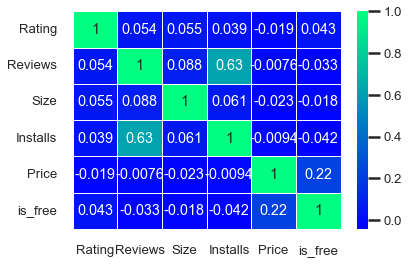

In [91]:
sns.heatmap( x , annot=True, cmap='winter', linewidths=.5 )
plt.show();

#### App Price in each Category

In [92]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3,0


In [93]:
avg_price_per_cat = pd.DataFrame(data_df.groupby('Category')['Price'].agg( np.mean ).sort_values( ascending=False ))

avg_price_per_cat.T

Category,FINANCE,LIFESTYLE,MEDICAL,EVENTS,FAMILY,PRODUCTIVITY,BOOKS_AND_REFERENCE,PHOTOGRAPHY,BUSINESS,WEATHER,PERSONALIZATION,TOOLS,GAME,SPORTS,COMMUNICATION,TRAVEL_AND_LOCAL,HEALTH_AND_FITNESS,MAPS_AND_NAVIGATION,PARENTING,AUTO_AND_VEHICLES,DATING,ENTERTAINMENT,ART_AND_DESIGN,EDUCATION,FOOD_AND_DRINK,SOCIAL,VIDEO_PLAYERS,SHOPPING,NEWS_AND_MAGAZINES,LIBRARIES_AND_DEMO,COMICS,BEAUTY,HOUSE_AND_HOME
Price,8.408203,6.398022,2.481591,1.718594,1.267149,0.670936,0.541946,0.420925,0.418353,0.41038,0.398369,0.322349,0.30703,0.306748,0.263101,0.228082,0.224216,0.205725,0.159667,0.158471,0.120294,0.101013,0.0995,0.078235,0.075714,0.06682,0.064172,0.027129,0.015669,0.011928,0.0,0.0,0.0


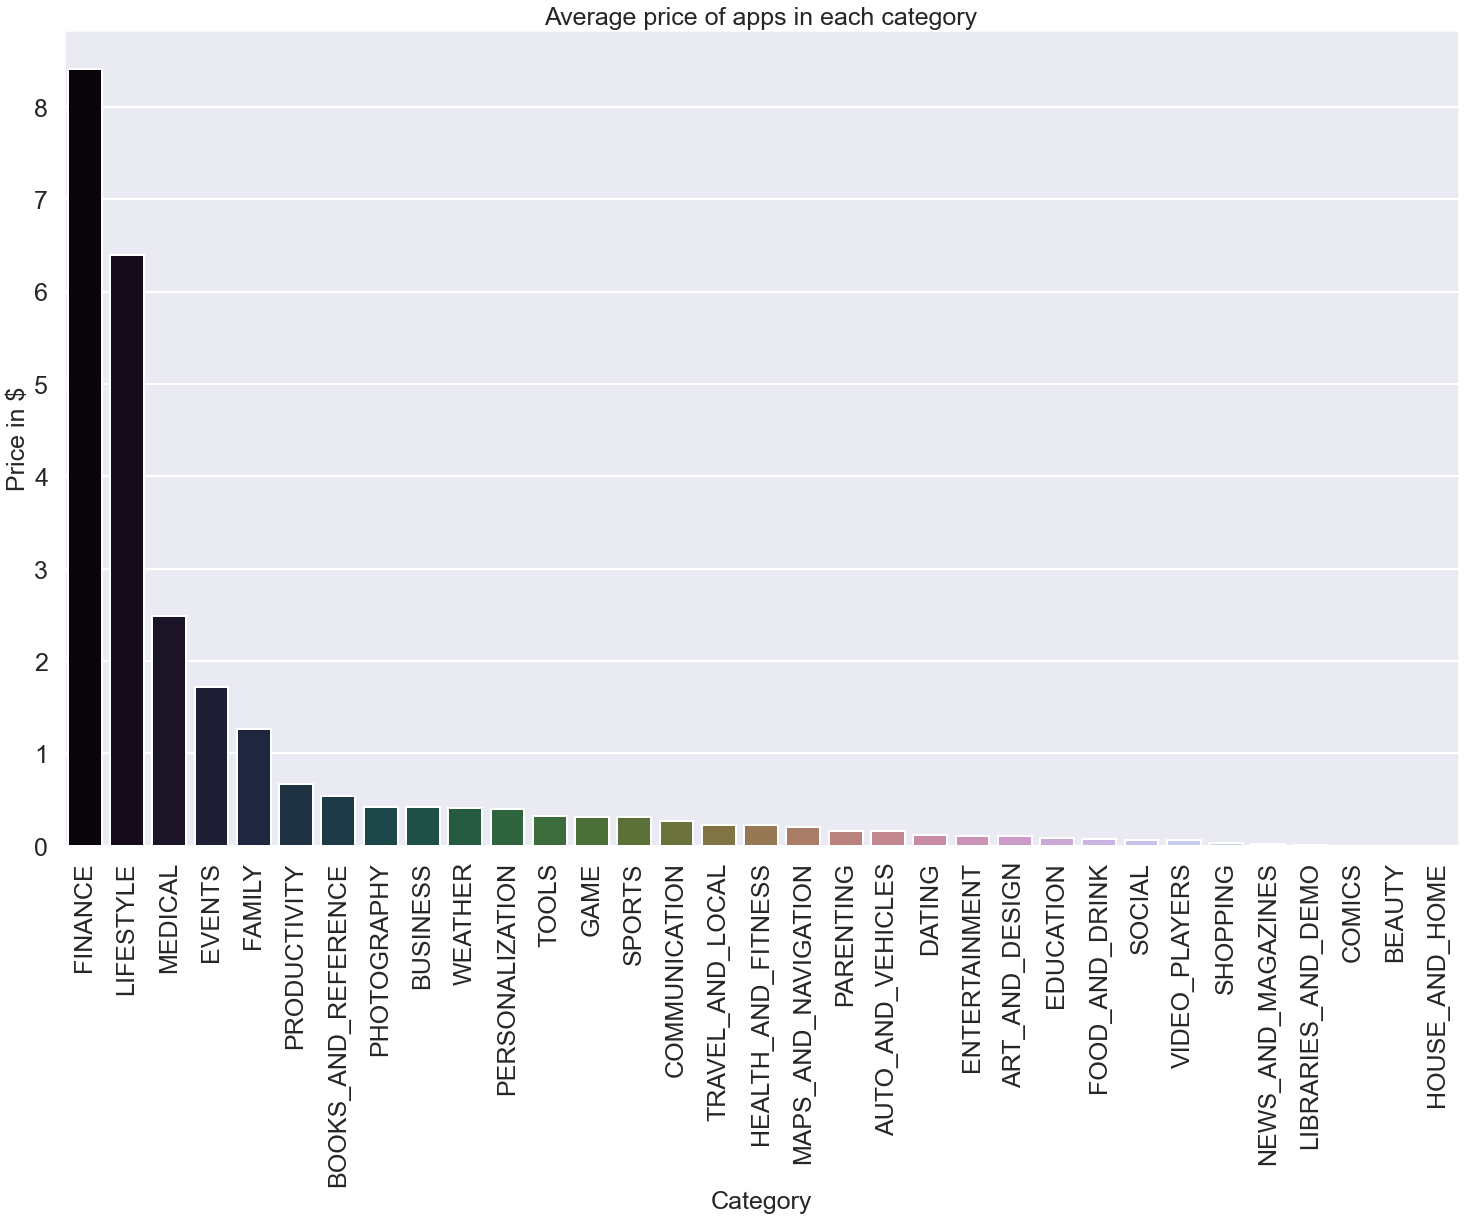

In [94]:
plt.figure(figsize=(25,15))

# set theme
sns.set_theme( style='darkgrid', context='poster', 
              font= 'sans-serif', color_codes= True, font_scale= .6, palette='deep' )

ax = sns.barplot( x=avg_price_per_cat.index , y=avg_price_per_cat['Price'],
            data=avg_price_per_cat, palette ='cubehelix' )

_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light' )

# set title
plt.title( 'Average price of apps in each category', fontsize=25 )
# set y label
plt.ylabel( 'Price in $', fontsize=25 )
# set x label
plt.xlabel( 'Category', fontsize=25 )

# fontsize of x and y parameters
ax.xaxis.set_tick_params( labelsize=25 )
ax.yaxis.set_tick_params( labelsize=25 )


plt.show();

In [95]:
print('Highest price for a app in play store is : ' +data_df[data_df['Price']==data_df.Price.max()]['App'].iloc[0] + 'with a price of $'+str(data_df['Price'].max()))

Highest price for a app in play store is : I'm Rich - Trump Editionwith a price of $400.0


INSIGHTS :

1. From the graph we cans see that FINANCE has a larger price in $ compared to other apps.

#### Distribution of app price

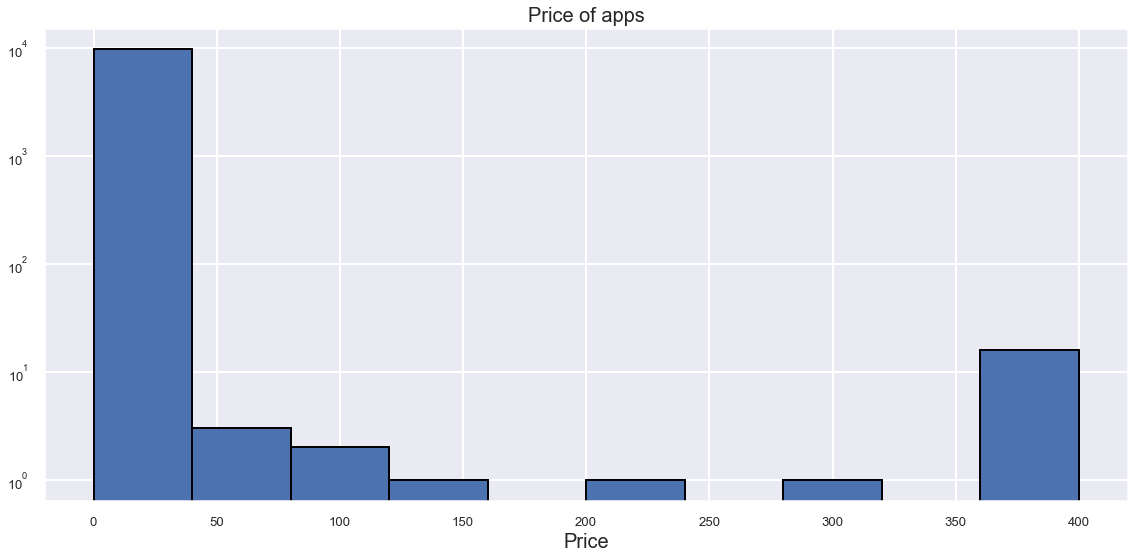

In [96]:
fig = plt.figure(figsize=(16,8))

plt.hist(data_df['Price'],edgecolor = 'black', log=True)

# set title
plt.title( 'Price of apps', fontsize=20 ) 
# set x label
plt.xlabel( 'Price', fontsize=20 )



plt.tight_layout()


#### Free vs Paid apps 

In [97]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,is_free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3,0


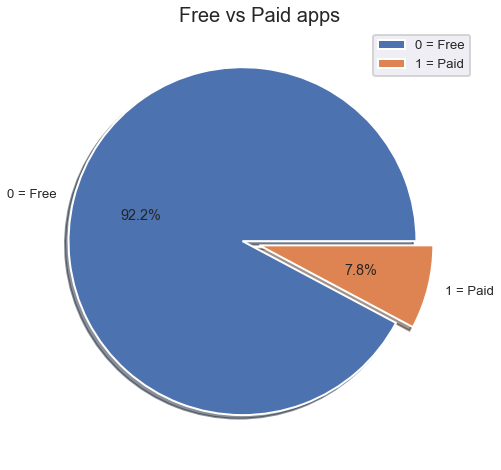

In [98]:
#How many percent of applications are free and how many are paid?
#to check how many apps are free

fig = plt.figure(figsize=(16,8)) 

labels = ['0 = Free','1 = Paid']
sizes = data_df['is_free'].value_counts(sort = True)

plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, explode=[0.1,0])
# set title
plt.title('Free vs Paid apps',size = 20)
# set the legend
plt.legend()

plt.show();

INSIGHTS :
    
1. As we can see 92.2% of the apps are free and 7.8% are paid

### Visualizing the reviews using word clouds

In [99]:
# first 5 rows of reviews data

reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [100]:
# total na values in reviews data

reviews_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [101]:
# shape of reviews data

reviews_df.shape

(64295, 5)

In [102]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [103]:
# dropping all the na values in reviews data

reviews_df.dropna(subset=['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'], inplace=True)

In [104]:
reviews_df.shape

(37427, 5)

In [105]:
# inspecting the sentiment column

reviews_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [106]:
# seperating sentiments as positive, negative and neutral

positive_comments = reviews_df[reviews_df['Sentiment'] == 'Positive']

negative_comments = reviews_df[reviews_df['Sentiment'] == 'Negative']

neutral_comments = reviews_df[reviews_df['Sentiment'] == 'Neutral']

In [107]:
stop_words = set(STOPWORDS)

In [108]:
total_positive = ' '.join(positive_comments['Translated_Review'])

total_negative = ' '.join(negative_comments['Translated_Review'])

total_neutral = ' '.join(neutral_comments['Translated_Review'])

#### Wordcloud for positive comments

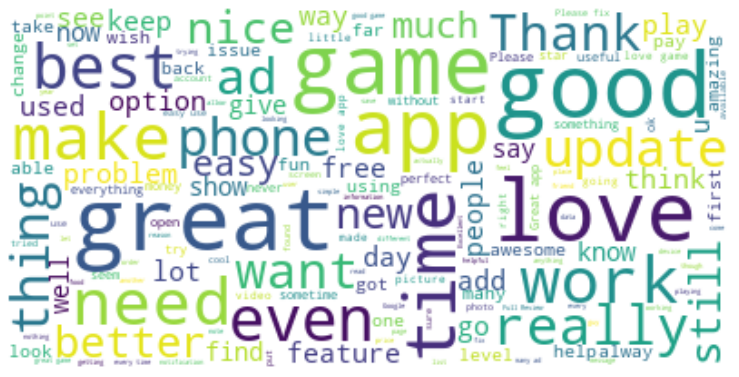

In [109]:
text = total_positive

plt.rcParams['figure.figsize'] = (13,13)

wordcloud = WordCloud(max_font_size=50, max_words=150, background_color='white').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

#### Wordcloud for negative comments

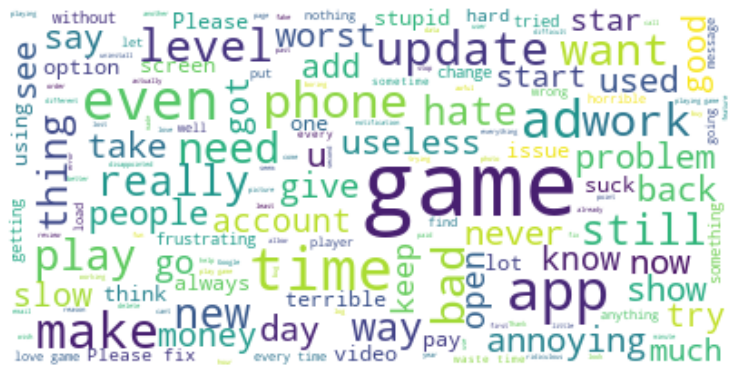

In [110]:
text = total_negative

plt.rcParams['figure.figsize'] = (13,13)

wordcloud = WordCloud(max_font_size=50, max_words=150, background_color='white').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

#### Wordcloud for neutarl comments

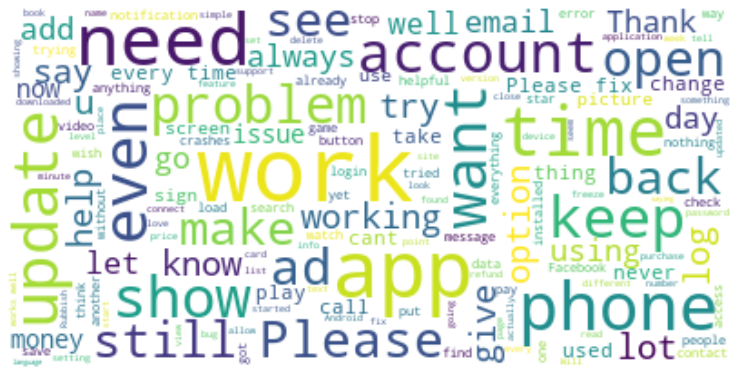

In [111]:
text = total_neutral

plt.rcParams['figure.figsize'] = (13,13)

wordcloud = WordCloud(max_font_size=50, max_words=150, background_color='white').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

__OBSERVATION__:

* There were a total 9643 data of apps after the completion of EDA with an average size of 19.46 mb.
* Higest app size is 95.37 mb and minimum size is 0.0081 mb.
* Family, Game, Tools have a higher count of apps whereas Beauty, Comics, Parenting have lower number of apps.
* With respect to ratings Art_and_Design, Events, Education have a higher rating while Datings, Maps_and_Navigtion, Video_Player have a lower rating, while the most apps have a rating 4.5. 
* In Content_Rating maximum is for 'Everyone' which comprices of 81.9%.
* With regard to Price 92.2% of apps are free and 7.8% are paid where the highest price is $400 which comes under the category of Finance.